In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from substrate_helpers import *

In [52]:
import sqlite3
import re
import datetime
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
from REST_API.database_queries import update_db

In [5]:
from substrateinterface import SubstrateInterface, Keypair
from substrateinterface.exceptions import SubstrateRequestException

substrate = SubstrateInterface(
    url="ws://127.0.0.1:9944",
    ss58_format=42,
    type_registry_preset='kusama'
)

In [6]:
con = sqlite3.connect('postthreadV1_write.db')
# con = sqlite3.connect('test1.db')
cur = con.cursor()

# Create a more interconnected social graph for existing users

In [84]:
df_users = pd.read_sql_query("""SELECT * FROM user""", con)

In [85]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   msa_id               611 non-null    int64 
 1   username             611 non-null    object
 2   password             611 non-null    object
 3   profile_pic          611 non-null    object
 4   wallet_ss58_address  611 non-null    object
 5   block_number         611 non-null    int64 
 6   msa_id_from_query    611 non-null    int64 
 7   provider_key         611 non-null    object
 8   date_minted          611 non-null    object
dtypes: int64(3), object(6)
memory usage: 43.1+ KB


In [57]:
for idx1, row1 in df_users.iterrows():
    for idx2, row2 in df_users.sample(min(100,len(df_users))).iterrows():
        follow_user(row1['msa_id_from_query'], row2['msa_id_from_query'])

Failed to send: {'code': 1016, 'message': 'Immediately Dropped', 'data': "The transaction couldn't enter the pool because of the limit"}
Failed to send: {'code': 1016, 'message': 'Immediately Dropped', 'data': "The transaction couldn't enter the pool because of the limit"}



KeyboardInterrupt



# Calculate social score

In [137]:
df = pd.read_sql_query("""SELECT * FROM follow""", con)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16543 entries, 0 to 16542
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   protagonist_msa_id  16543 non-null  int64 
 1   antagonist_msa_id   16543 non-null  int64 
 2   event               16543 non-null  object
 3   block_number        16543 non-null  int64 
 4   msa_id_from_query   16543 non-null  int64 
 5   provider_key        16543 non-null  object
 6   date_minted         16543 non-null  object
dtypes: int64(4), object(3)
memory usage: 904.8+ KB


In [139]:
df.to_csv('follow_data.csv')

In [144]:
df2 = pd.read_csv('follow_data.csv', index_col="Unnamed: 0")

In [145]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16543 entries, 0 to 16542
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   protagonist_msa_id  16543 non-null  int64 
 1   antagonist_msa_id   16543 non-null  int64 
 2   event               16543 non-null  object
 3   block_number        16543 non-null  int64 
 4   msa_id_from_query   16543 non-null  int64 
 5   provider_key        16543 non-null  object
 6   date_minted         16543 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.0+ MB


In [146]:
G = nx.DiGraph()
G.add_edges_from(df[['protagonist_msa_id', 'antagonist_msa_id']].values.tolist())

In [158]:
nx.centrality.betweenness_centrality?

In [168]:
%%time
betweeness_scores = nx.betweenness_centrality(G, k=100)

CPU times: user 724 ms, sys: 0 ns, total: 724 ms
Wall time: 840 ms


In [147]:

    degree_scores = nx.degree_centrality(G)
    closeness_scores = nx.closeness_centrality(G)
    betweeness_scores = nx.betweenness_centrality(G)

KeyboardInterrupt: 

In [123]:
df[df['protagonist_msa_id'] == 693]

,protagonist_msa_id,antagonist_msa_id,event,block_number,msa_id_from_query,provider_key,date_minted
123,693,382,follow,3955,693,5FHneW46xGXgs5mUiveU4sbTyGBzmstUspZC92UhjJM694ty,2022-06-24 17:25:12
124,693,694,follow,3955,693,5FHneW46xGXgs5mUiveU4sbTyGBzmstUspZC92UhjJM694ty,2022-06-24 17:25:12
125,693,695,follow,3955,693,5FHneW46xGXgs5mUiveU4sbTyGBzmstUspZC92UhjJM694ty,2022-06-24 17:25:12
126,693,696,follow,3955,693,5FHneW46xGXgs5mUiveU4sbTyGBzmstUspZC92UhjJM694ty,2022-06-24 17:25:12


In [124]:
df[df['antagonist_msa_id'] == 693]

,protagonist_msa_id,antagonist_msa_id,event,block_number,msa_id_from_query,provider_key,date_minted
127,382,693,follow,3955,382,5FHneW46xGXgs5mUiveU4sbTyGBzmstUspZC92UhjJM694ty,2022-06-24 17:25:12
131,694,693,follow,3955,694,5FHneW46xGXgs5mUiveU4sbTyGBzmstUspZC92UhjJM694ty,2022-06-24 17:25:12
135,695,693,follow,3955,695,5FHneW46xGXgs5mUiveU4sbTyGBzmstUspZC92UhjJM694ty,2022-06-24 17:25:12
139,696,693,follow,3955,696,5FHneW46xGXgs5mUiveU4sbTyGBzmstUspZC92UhjJM694ty,2022-06-24 17:25:12
490,7,693,follow,6885,7,5FHneW46xGXgs5mUiveU4sbTyGBzmstUspZC92UhjJM694ty,2022-06-25 13:02:24
622,8,693,follow,6885,8,5FHneW46xGXgs5mUiveU4sbTyGBzmstUspZC92UhjJM694ty,2022-06-25 13:02:24
924,11,693,follow,6885,11,5FHneW46xGXgs5mUiveU4sbTyGBzmstUspZC92UhjJM694ty,2022-06-25 13:02:24
1308,15,693,follow,6886,15,5FHneW46xGXgs5mUiveU4sbTyGBzmstUspZC92UhjJM694ty,2022-06-25 13:02:48
1896,21,693,follow,6886,21,5FHneW46xGXgs5mUiveU4sbTyGBzmstUspZC92UhjJM694ty,2022-06-25 13:02:48
2020,22,693,follow,6887,22,5FHneW46xGXgs5mUiveU4sbTyGBzmstUspZC92UhjJM694ty,2022-06-25 13:03:12


In [83]:
for user_msa_id in df['protagonist_msa_id'].unique():
    degree_scores = nx.degree_centrality(G)
    closeness_scores = nx.closeness_centrality(G)
    betweeness_scores = nx.betweenness_centrality(G)
    
    degree_max = max(degree_scores.values())
    closeness_max = max(closeness_scores.values())
    betweeness_max = max(betweeness_scores.values())
    
    degree_user = 0 if degree_max == 0 else degree_scores[user_msa_id] / degree_max
    closeness_user = 0 if closeness_max == 0 else closeness_scores[user_msa_id] / closeness_max
    betweeness_user = 0 if betweeness_max == 0 else betweeness_scores[user_msa_id] / betweeness_max
    
    centralities = [degree_user, closeness_user, betweeness_user]
    centralities.sort(reverse=True)
    
    weighted_avg = 0
    for i, score in enumerate(centralities):
        weighted_avg += score * i
        
    weighted_avg = weighted_avg / 6
    print(user_msa_id, weighted_avg)

97 0.015779092702169626
135 0.0073964497041420114
136 0.008875739644970413
137 0.007889546351084813
138 0.009368836291913216
139 0.0059171597633136085
140 0.007889546351084813
141 0.006410256410256411
142 0.0073964497041420114
40 0.09733563363166041
143 0.008382642998027613
144 0.009861932938856016
145 0.006903353057199212
146 0.008382642998027613
147 0.008875739644970413
148 0.008875739644970413
149 0.007889546351084813
150 0.026587562099768692
151 0.07256633539439718
152 0.06731461882180441
153 0.06409905543132198
154 0.06251977966973475
155 0.05934791286810593
156 0.06342917784895531
157 0.07567169012878362
158 0.07197021617214253
159 0.069616928104954
160 0.06888166523199356
161 0.07833185551576717
162 0.05747114243419741
163 0.006903353057199212
164 0.006410256410256411
165 0.010355029585798816
166 0.005424063116370809
167 0.010355029585798816
168 0.006410256410256411
169 0.006903353057199212
170 0.006410256410256411
171 0.009368836291913216
172 0.008382642998027613
173 0.00641025

KeyboardInterrupt: 

NetworkXError: Node 97 has no position.

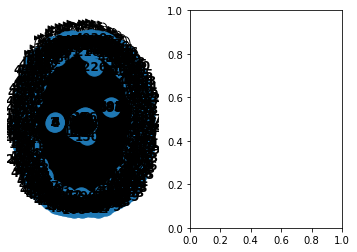

In [64]:
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [ ]:
G.predecessors(160)

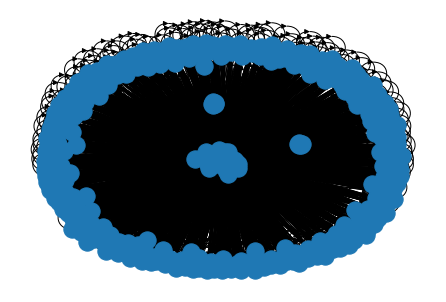

In [65]:
nx.draw(G)

In [66]:
plt.show()

In [79]:
nx.bfs_tree(G, 160, reverse=False)

In [86]:
nx.node_connected_component(G, 22)

NetworkXNotImplemented: not implemented for directed type

In [90]:
nx.to_dict_of_dicts(nx.bfs_tree(G, 22, reverse=False))

{22: {223: {},
  197: {},
  73: {},
  172: {},
  157: {},
  4975: {},
  9: {},
  105: {},
  90: {},
  4852: {},
  1238: {},
  4936: {},
  139: {},
  4841: {},
  113: {},
  180: {},
  103: {},
  106: {},
  51: {},
  4961: {},
  4903: {},
  27: {},
  4867: {},
  192: {},
  144: {},
  43: {},
  4939: {},
  7: {},
  23: {},
  741: {},
  694: {},
  108: {},
  178: {},
  26: {},
  4: {},
  4237: {},
  320: {},
  4940: {},
  4869: {},
  88: {},
  179: {},
  203: {},
  4964: {},
  3915: {},
  696: {},
  4928: {},
  3004: {},
  4817: {},
  110: {},
  45: {},
  131: {},
  4857: {},
  142: {},
  2586: {},
  99: {},
  4902: {},
  201: {},
  4314: {},
  4899: {},
  4218: {},
  6: {},
  4980: {},
  999: {},
  224: {},
  3636: {},
  3079: {},
  2: {},
  4891: {},
  21: {},
  97: {},
  4871: {},
  13: {},
  100: {},
  147: {},
  4916: {},
  4850: {},
  111: {},
  95: {},
  3801: {},
  4981: {},
  4849: {},
  146: {},
  4947: {},
  693: {},
  206: {},
  62: {},
  4991: {},
  15: {},
  76: {},
  4952: {

In [135]:
nx.set_node_attributes(G, [], "labels")

In [136]:
nx.write_gexf(G, "test.gexf")

In [ ]:
nx.from_dict_of_dicts

In [134]:
nx.generate_gexf?

In [94]:
from pyvis.network import Network

In [96]:
net = Network(notebook=True)

In [97]:
net.from_nx(G)

In [99]:
net.from_nx?

In [102]:
>>> net.from_nx(nx.bfs_tree(G, 22, reverse=False))

In [104]:
nx.write_graphml(nx.bfs_tree(G, 22, reverse=False), "./graphml_test.xml")

In [105]:
gg = nx.bfs_tree(G, 22, reverse=False)

In [109]:
!pip install pydot 

In [110]:
PG = nx.nx_pydot.to_pydot(gg)
H = nx.nx_pydot.from_pydot(PG)

In [111]:
H

In [106]:
A = nx.nx_agraph.to_agraph(gg)
H = nx.nx_agraph.from_agraph(A)

ImportError: requires pygraphviz http://pygraphviz.github.io/

In [121]:
nx.bfs_tree(G, 693, reverse=False)

In [129]:
nx.community?

In [128]:
nx.bfs_tree?

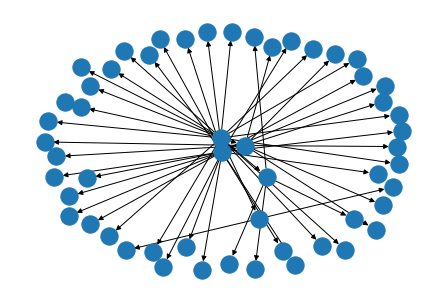

In [126]:
nx.draw(nx.bfs_tree(G, 693, reverse=True))

In [115]:
nx.nx_pydot.write_dot(gg, "./test.dot")

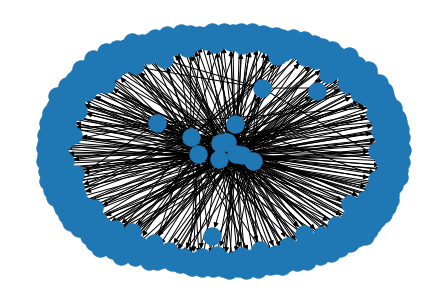

In [112]:
nx.draw(H)

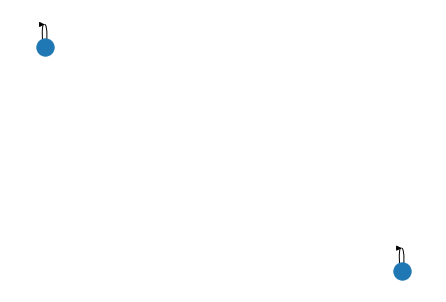

In [77]:
nx.draw(G.subgraph([160, 161]))

In [75]:
df[(df['protagonist_msa_id'] == 160) | (df['antagonist_msa_id'] == 160)]

,protagonist_msa_id,antagonist_msa_id,event,block_number,msa_id_from_query,provider_key,date_minted
28,160,160,follow,3493,160,5FHneW46xGXgs5mUiveU4sbTyGBzmstUspZC92UhjJM694ty,'2022-06-24 14:18:48'
554,7,160,follow,6885,7,5FHneW46xGXgs5mUiveU4sbTyGBzmstUspZC92UhjJM694ty,'2022-06-25 13:02:24'
1307,15,160,follow,6886,15,5FHneW46xGXgs5mUiveU4sbTyGBzmstUspZC92UhjJM694ty,'2022-06-25 13:02:48'
2083,23,160,follow,6887,23,5FHneW46xGXgs5mUiveU4sbTyGBzmstUspZC92UhjJM694ty,'2022-06-25 13:03:12'
3260,17,160,follow,6888,17,5FHneW46xGXgs5mUiveU4sbTyGBzmstUspZC92UhjJM694ty,'2022-06-25 13:03:42'
...,...,...,...,...,...,...,...
7238,160,105,follow,6893,160,5FHneW46xGXgs5mUiveU4sbTyGBzmstUspZC92UhjJM694ty,'2022-06-25 13:05:42'
7239,160,4961,follow,6893,160,5FHneW46xGXgs5mUiveU4sbTyGBzmstUspZC92UhjJM694ty,'2022-06-25 13:05:42'
7240,160,4851,follow,6893,160,5FHneW46xGXgs5mUiveU4sbTyGBzmstUspZC92UhjJM694ty,'2022-06-25 13:05:42'
7241,160,220,follow,6893,160,5FHneW46xGXgs5mUiveU4sbTyGBzmstUspZC92UhjJM694ty,'2022-06-25 13:05:42'
